MNIST Classification - Multiclass Classification - K Nearest Neighbors

Goal: Predict which digit (0–9) is shown in an 8x8 pixel image


In [ ]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import pandas as pd

# Load the digits dataset
digits = load_digits()

# Check shape
print("Data shape:", digits.data.shape)
print("Target classes:", set(digits.target))

Data shape: (1797, 64)
Target classes: {np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9)}


In [ ]:
X, y = digits["data"], digits["target"]
X.shape

(1797, 64)

In [ ]:
y.shape

(1797,)

<Figure size 640x480 with 0 Axes>

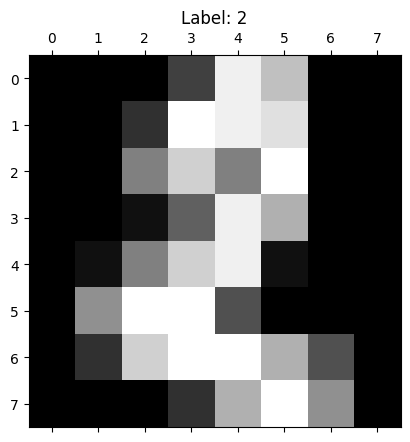

In [ ]:
# Show one digit image
plt.gray()
plt.matshow(digits.images[2])
plt.title(f"Label: {digits.target[2]}")
plt.show()

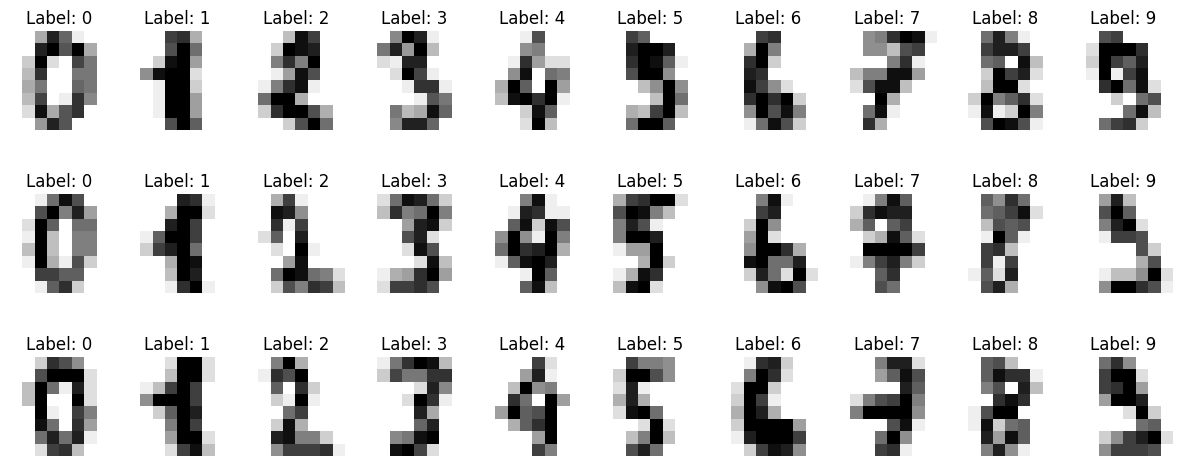

In [ ]:
figure, axes = plt.subplots(nrows=3, ncols=10, figsize=(15, 6))

for ax, image, label in zip(axes.ravel(), digits.images, y):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Label: {label}")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = digits.data
y = digits.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [ ]:
knn.score(X_test, y_test)

0.9925925925925926

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict
y_pred = knn.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9925925925925926


In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[53,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 50,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 47,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 54,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 60,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 65,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 53,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 55,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 43,  0],
       [ 0,  0,  0,  1,  1,  1,  0,  0,  0, 56]])

Text(83.22222222222221, 0.5, 'Actual')

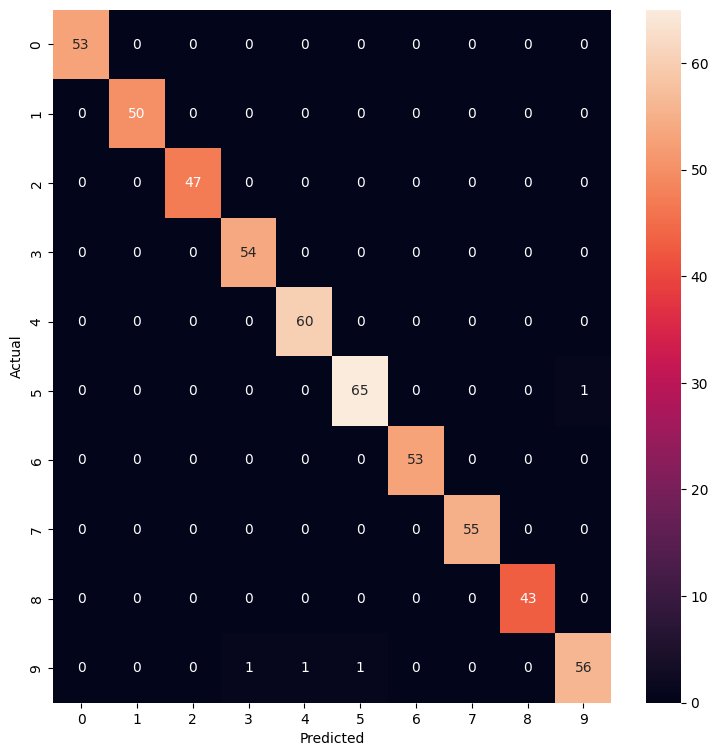

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel("Actual")

In [ ]:
print("Classification Report:",classification_report(y_test, y_pred))

Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        47
           3       0.98      1.00      0.99        54
           4       0.98      1.00      0.99        60
           5       0.98      0.98      0.98        66
           6       1.00      1.00      1.00        53
           7       1.00      1.00      1.00        55
           8       1.00      1.00      1.00        43
           9       0.98      0.95      0.97        59

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540



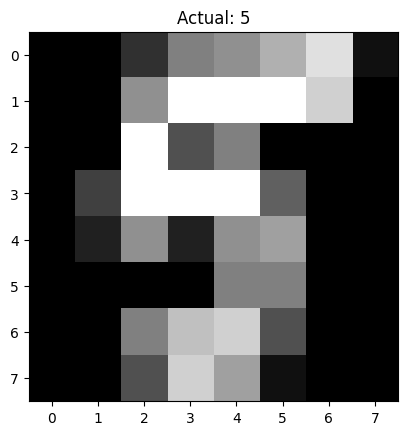

Predicted: 5


In [ ]:
# Pick a digit from the test set
index = 50
plt.imshow(X_test[index].reshape(8, 8), cmap='gray')
plt.title(f"Actual: {y_test[index]}")
plt.show()

# Predict
prediction = knn.predict([X_test[index]])
print("Predicted:", prediction[0])